# For the 1st step of the project, pls see the file: project2_1

## Goal: One by one passengers survived or died

## Get the Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import classification_report 

from IPython.display import IFrame
import warnings
warnings.filterwarnings("ignore")

In [2]:
titanic=pd.read_csv('~/spicy/binomial-baharat-student-code/week02/data/train.csv')
titanic.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Initialy Explore

In [3]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [4]:
titanic['Parch'].nunique()

7

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

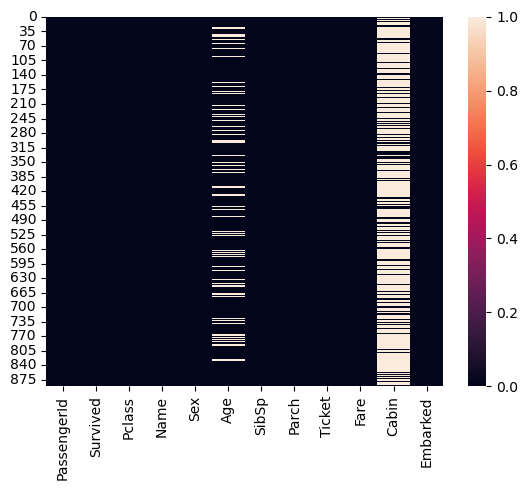

In [6]:
sns.heatmap(titanic.isna())

##### Cabin has almost no values, Age also has some missing values. Drop Cabin, let age as feature enginnering

##### One can check all correlations visually, by plotting all combinations of features

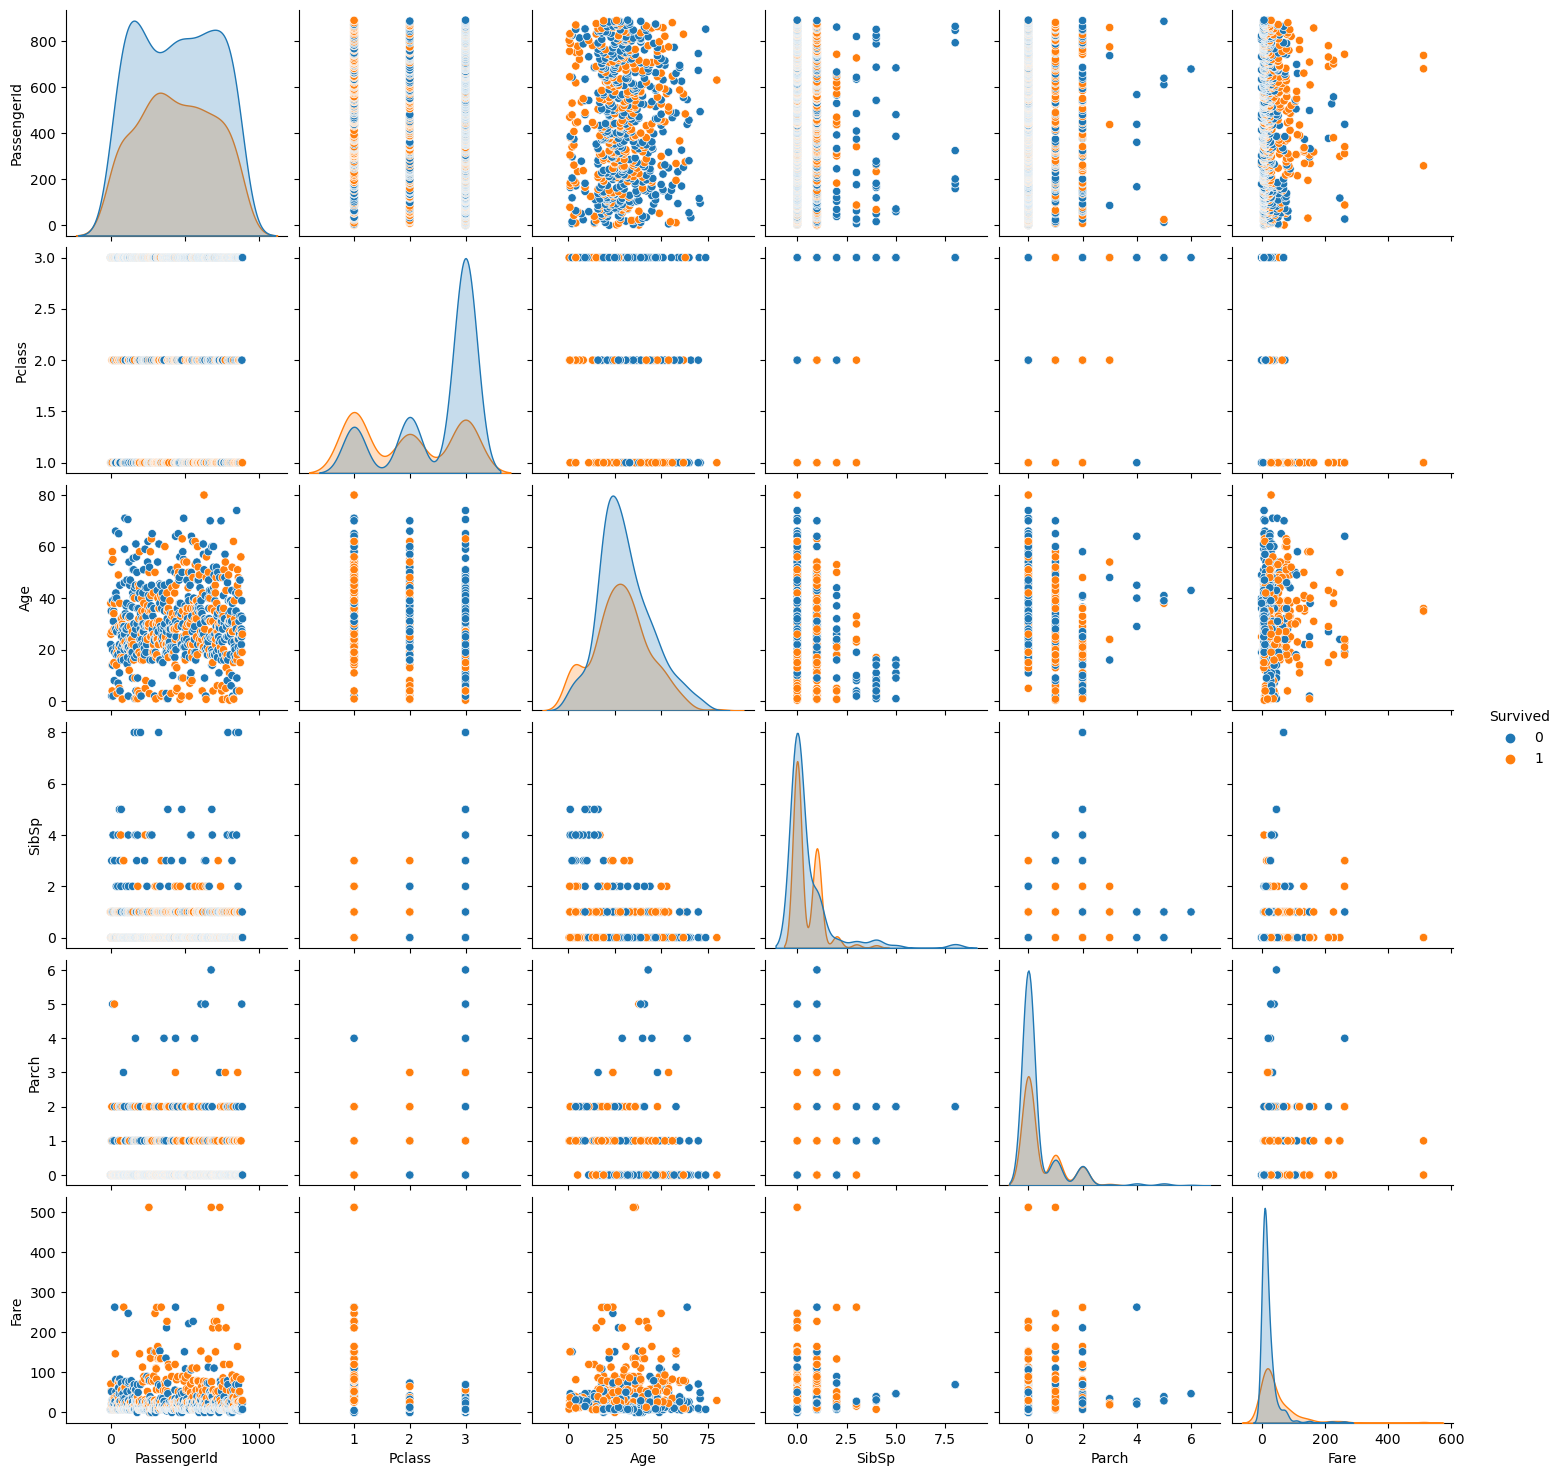

In [7]:
sns.pairplot(titanic, hue='Survived')

#### But linear correlations (basic correlations) can be automatically calculated

<AxesSubplot:>

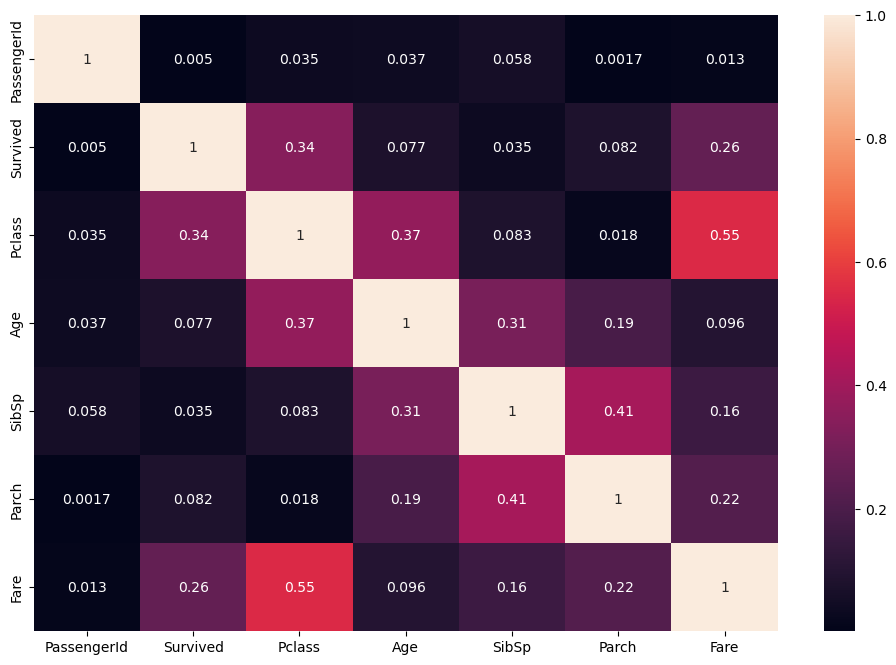

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(titanic.corr().abs(), annot=True) 
# We only care absolute values, not vector direction: abs()
# annot for the written values

#### Lets check the correlation, between the features. If they are strongly related no need to add them to model! Here we can see there is highly correlation between Pclass and Fare. It is easier to classify Pclass. 
#### So drop correlated values: Fare, SibSp 
#### Name and Ticket is hard to transfer. Initially drop some features (Choose feature as simple but educative way!)
#### Also drop some other features to make our make our life easier
##### missing values Cabin, Age
##### non-linear dependencies for Age->Survived
##### features as str and categorical features: Sex, Cabin, Embarked, Pclass


In [9]:
blackbox=titanic.drop(columns=['Cabin','Ticket', 'Name', 'Fare', 'PassengerId', 'SibSp'])  
blackbox.head(5)

,Survived,Pclass,Sex,Age,Parch,Embarked
0,0,3,male,22.0,0,S
1,1,1,female,38.0,0,C
2,1,3,female,26.0,0,S
3,1,1,female,35.0,0,S
4,0,3,male,35.0,0,S


In [10]:
blackbox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Parch     891 non-null    int64  
 5   Embarked  889 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 41.9+ KB


## Train/test split

In [11]:
X = blackbox.drop(columns=['Survived'])
y = blackbox['Survived']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Parch     891 non-null    int64  
 4   Embarked  889 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB


In [12]:
y.info();

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [14]:
X_train.shape, X_test.shape

((668, 5), (223, 5))

##### Yes, the number of the feature are same

In [15]:
y_train.shape, y_test.shape

((668,), (223,))

##### Yes, they both vector

## Feature engineering

In [16]:
### Make it one by one without pipeline:
#cols = X[['Embarked']]
#imputer = SimpleImputer(strategy = 'most_frequent')
#imputer.fit(cols)
#t = imputer.transform(cols)
#X['Embarked_Imputed']=t
#X.info()
####

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 73 to 529
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    668 non-null    int64  
 1   Sex       668 non-null    object 
 2   Age       528 non-null    float64
 3   Parch     668 non-null    int64  
 4   Embarked  666 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 31.3+ KB


## Pipelines

In [18]:
### Here when I apply also onehotencoder it outputs 2xn matrix. Is it normal?
cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse=False,  handle_unknown='ignore') #sometimes error can happen than add drop='first' (in that case handle_unknown can not be used!)
)

In [19]:
num_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    #MinMaxScaler()
)

In [20]:
#If we wanted to make without columntransformer:
#X_train[['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Class_1', 'Class_2', 'Class_1']] = cat_pipe.fit_transform(X[['Embarked', 'Pclass']])

In [21]:
### Create custom function

#def name_length(df):
    #length = df[df.columns[0]].str.len()
    #return length.values.reshape(-1, 1)

In [ ]:
hs

In [22]:
X_train.isnull().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 73 to 529
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    668 non-null    bool 
 1   Sex       668 non-null    bool 
 2   Age       668 non-null    bool 
 3   Parch     668 non-null    bool 
 4   Embarked  668 non-null    bool 
dtypes: bool(5)
memory usage: 8.5 KB


In [23]:
feature_transform = ColumnTransformer(
    transformers=[
        ("num", num_pipe, ['Age']),
        ("cat", cat_pipe, ['Pclass', 'Embarked', 'Parch', 'Sex']),
        #("name", FunctionTransformer(name_length), ['Name'])
        #("do_nothing", 'passthrough', ['SibSp'])
    ]

)#remainder='passthrough', 'drop'

In [24]:
cat_features=X_train['embarked','age']
#X_train['Embarked']=cat_pipe.transform(cat_features)
#X_train['Age']=num_pipe.transform(num_features)
#X_train['Age']=round(X_train['Age'])
#X_train['Pclass'].head(5)

In [25]:
X_train['Embarked'].head(5)

73     C
363    S
548    S
46     Q
624    S
Name: Embarked, dtype: object

In [26]:
X_train.isnull().sum()
#X.info()

Pclass        0
Sex           0
Age         140
Parch         0
Embarked      2
dtype: int64

In [27]:
X_train['Age']

73     26.0
363    35.0
548    33.0
46      NaN
624    21.0
       ... 
527     NaN
224    38.0
405    34.0
594    37.0
529    23.0
Name: Age, Length: 668, dtype: float64

In [28]:
#m= LogisticRegression()
#m.fit(X_train, y_train)

## Train DummyClassifier

In [29]:
m_dummy = DummyClassifier()
m_dummy.fit(X_train, y_train)

DummyClassifier()

In [30]:
# run this for your training dataset
m_dummy.score(X_train,y_train)

0.6167664670658682

In [31]:
# run this for your test dataset
m_dummy.score(X_test,y_test) 

0.6143497757847534

In [32]:
m_dummy.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [33]:
m_dummy.predict_proba(X_test)

array([[0.61676647, 0.38323353],
       [0.61676647, 0.38323353],
       [0.61676647, 0.38323353],
       [0.61676647, 0.38323353],
       [0.61676647, 0.38323353],
       [0.61676647, 0.38323353],
       [0.61676647, 0.38323353],
       [0.61676647, 0.38323353],
       [0.61676647, 0.38323353],
       [0.61676647, 0.38323353],
       [0.61676647, 0.38323353],
       [0.61676647, 0.38323353],
       [0.61676647, 0.38323353],
       [0.61676647, 0.38323353],
       [0.61676647, 0.38323353],
       [0.61676647, 0.38323353],
       [0.61676647, 0.38323353],
       [0.61676647, 0.38323353],
       [0.61676647, 0.38323353],
       [0.61676647, 0.38323353],
       [0.61676647, 0.38323353],
       [0.61676647, 0.38323353],
       [0.61676647, 0.38323353],
       [0.61676647, 0.38323353],
       [0.61676647, 0.38323353],
       [0.61676647, 0.38323353],
       [0.61676647, 0.38323353],
       [0.61676647, 0.38323353],
       [0.61676647, 0.38323353],
       [0.61676647, 0.38323353],
       [0.

In [34]:
# run this for Kaggle test dataset
# m.predict(X_test_kaggle)

## Logistic Regression

In [35]:
#X = blackbox[['Pclass', 'Sex', 'Age', 'Parch', 'Embarked']]
#y = blackbox['Survived']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
#X_train.shape

In [36]:
#instantiating the model
# this is the step where u also will be defining the "hyperparameters" of your model
X_lrog=X_train[['Pclass','Parch']]
mlr= LogisticRegression()

In [37]:
mlr.fit(X_lrog, y_train) #Age float i can not add find a way to turn to int

LogisticRegression()

In [38]:
mlr.coef_, mlr.intercept_

(array([[-0.81313521,  0.3015279 ]]), array([1.22327506]))

In [39]:
mlr.predict_proba(X_lrog)


array([[0.77138188, 0.22861812],
       [0.77138188, 0.22861812],
       [0.71394109, 0.28605891],
       ...,
       [0.59940711, 0.40059289],
       [0.59940711, 0.40059289],
       [0.52534512, 0.47465488]])

In [40]:
mlr.predict(X_lrog)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,

In [41]:
mlr.score(X_lrog, y_train)

0.6901197604790419

<AxesSubplot:xlabel='Pclass', ylabel='Parch'>

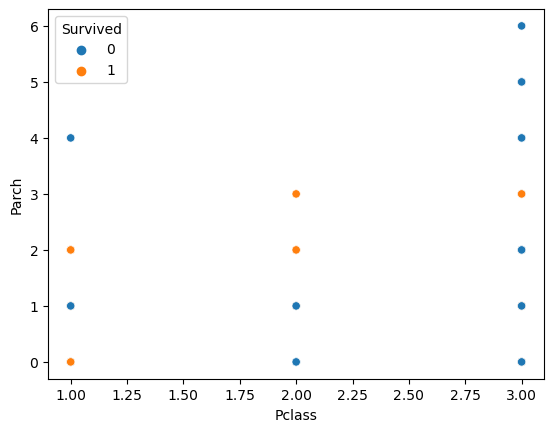

In [42]:
sns.scatterplot(data=X_lrog, x='Pclass', y='Parch', hue=y_train)

## Evaluating Classifiers

In [43]:
y_pred = mlr.predict(X_lrog)
y_train

73     0
363    0
548    0
46     0
624    0
      ..
527    0
224    1
405    0
594    0
529    0
Name: Survived, Length: 668, dtype: int64

In [44]:
metrics.accuracy_score(y_train, y_pred)

0.6901197604790419

In [45]:
metrics.precision_score(y_train, y_pred)#,pos_label='Gentoo'

0.6296296296296297

In [46]:
metrics.f1_score(y_train, y_pred) #,pos_label='Gentoo'

0.5348314606741572

### Confusion Matrix

In [47]:
metrics.confusion_matrix(y_train, y_pred)

array([[342,  70],
       [137, 119]])

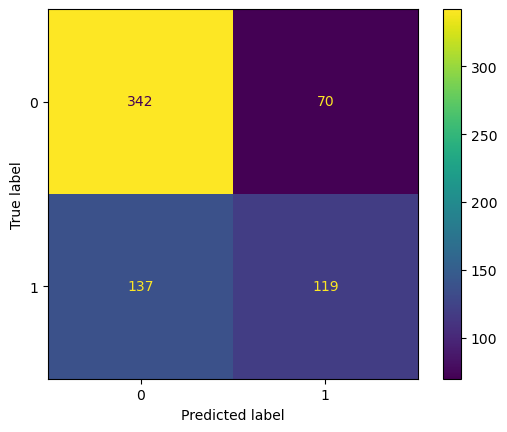

In [48]:
metrics.plot_confusion_matrix(mlr, X_lrog, y_train)

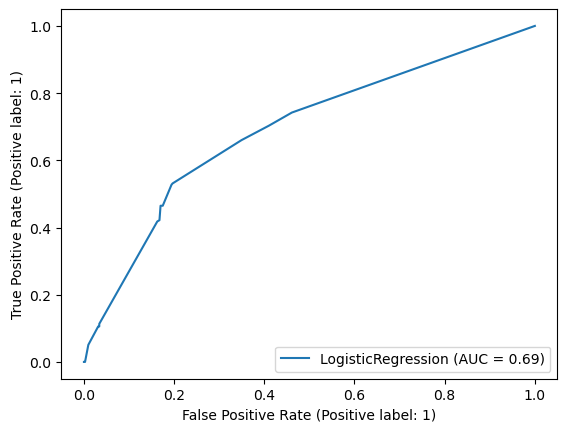

In [49]:
metrics.plot_roc_curve(mlr, X_lrog, y_train)

## Random Forest

In [50]:
plt.rcParams['figure.figsize'] = (8, 6)

In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 5), (223, 5), (668,), (223,))

In [52]:
df_train = pd.concat([X_train, y_train], axis = 1)
df_train.head()

,Pclass,Sex,Age,Parch,Embarked,Survived
73,3,male,26.0,0,C,0
363,3,male,35.0,0,S,0
548,3,male,33.0,1,S,0
46,3,male,NaN,0,Q,0
624,3,male,21.0,0,S,0


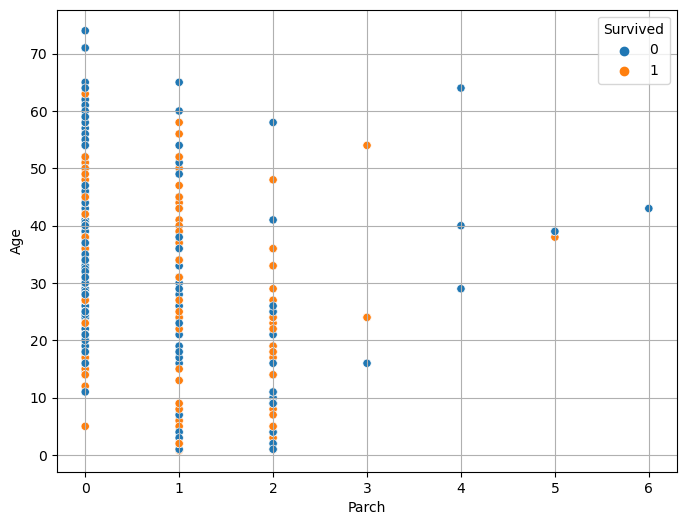

In [53]:
sns.scatterplot(data = df_train, x = 'Parch', y = 'Age', hue =y_train)
plt.grid()

In [65]:
X_trans=feature_transform.fit_transform(X_train)
mrf = DecisionTreeClassifier()

In [66]:
mrf.fit(X_trans, y_train)

DecisionTreeClassifier()

In [72]:
mrf.score(X_trans, y_train)

0.9191616766467066

In [73]:
#plt.figure(figsize = (25,15))
#t = plot_tree(mrf, feature_names = ['Pclass','Parch','Age'], class_names=['0','1'], filled=True)

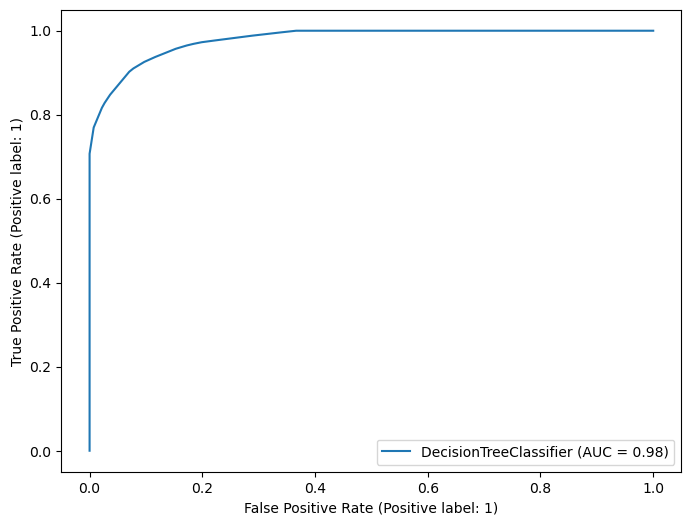

In [79]:
metrics.plot_roc_curve(mrf, X_trans, y_train)

## Random Forest Classifier

In [74]:
X_trans2=feature_transform.fit_transform(X_train)
rfc = RandomForestClassifier(n_estimators=120, max_depth=15)    #Hyperparam: n_estimators(number of trees)
rfc.fit(X_trans2, y_train)

RandomForestClassifier(max_depth=15, n_estimators=120)

In [75]:
round(rfc.score(X_trans2, y_train),2)

0.92

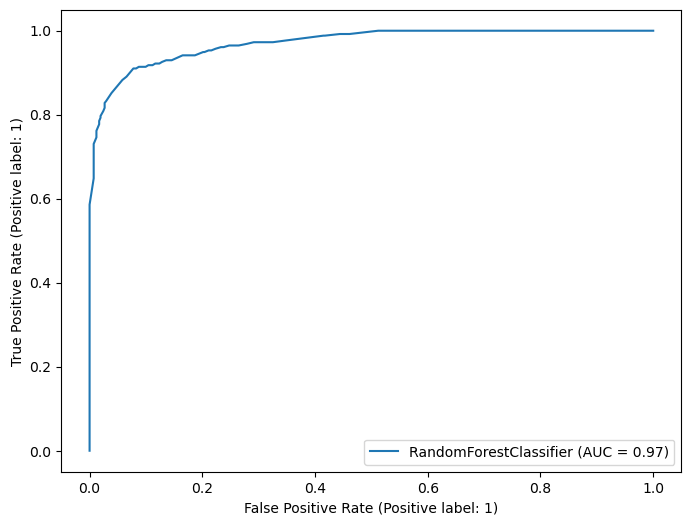

In [78]:
metrics.plot_roc_curve(rfc, X_trans2, y_train)

In [76]:
X_test_trans=feature_transform.fit_transform(X_test)
round(rfc.score(X_test_trans, y_test),3)
X_test_trans

ValueError: X has 15 features, but RandomForestClassifier is expecting 16 features as input.

## Subbmit ti Kaggle

In [64]:
rfc.predict(X_rf)

NameError: name 'X_rf' is not defined

In [ ]:
tahmin=rfc.predict(X_rf)
numara=titanic['PassengerId']
bas= pd.concat([numara, tahmin]), axis = 1)
#bas.head()
#bas=rfc.predict(X_rf)
#bas.to_csv()


In [80]:
numara=titanic['PassengerId']

In [81]:
numara

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64